# Celeba Dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import torch
import torch.nn as nn
import torchvision
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
import glob
import random
from PIL import Image
from sklearn.model_selection import train_test_split
import seaborn as sns

In [3]:
!pip install torchinfo
from torchinfo import summary

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
!unzip  "/content/drive/MyDrive/Neural Network colab/DATASETS/CelebA_Dataset.zip" -d "/content/new_celeba"

Streaming output truncated to the last 5000 lines.
  inflating: /content/new_celeba/img_align_celeba/197602.jpg  
  inflating: /content/new_celeba/img_align_celeba/197603.jpg  
  inflating: /content/new_celeba/img_align_celeba/197604.jpg  
  inflating: /content/new_celeba/img_align_celeba/197605.jpg  
  inflating: /content/new_celeba/img_align_celeba/197606.jpg  
  inflating: /content/new_celeba/img_align_celeba/197607.jpg  
  inflating: /content/new_celeba/img_align_celeba/197608.jpg  
  inflating: /content/new_celeba/img_align_celeba/197609.jpg  
  inflating: /content/new_celeba/img_align_celeba/197610.jpg  
  inflating: /content/new_celeba/img_align_celeba/197611.jpg  
  inflating: /content/new_celeba/img_align_celeba/197612.jpg  
  inflating: /content/new_celeba/img_align_celeba/197613.jpg  
  inflating: /content/new_celeba/img_align_celeba/197614.jpg  
  inflating: /content/new_celeba/img_align_celeba/197615.jpg  
  inflating: /content/new_celeba/img_align_celeba/197616.jpg  
  in

In [5]:
PATH = "/content/drive/MyDrive/Neural Network colab/DATASETS/list_attr_celeba.csv"

In [6]:
data = pd.read_csv("/content/new_celeba/list_attr_celeba.txt",delim_whitespace=True, header=1)
data = data[:30000]
data

,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,-1,...,-1,1,1,-1,1,-1,1,-1,-1,1
000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,...,-1,-1,-1,1,-1,-1,-1,-1,-1,1
000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,1,-1,1,-1,1,1,-1,1
000005.jpg,-1,1,1,-1,-1,-1,1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
029996.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,...,-1,1,-1,-1,-1,1,-1,-1,-1,1
029997.jpg,-1,-1,-1,-1,-1,-1,1,1,1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,1,1
029998.jpg,-1,-1,-1,-1,-1,-1,1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,1
029999.jpg,-1,-1,-1,-1,-1,-1,-1,1,1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 000001.jpg to 030000.jpg
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   5_o_Clock_Shadow     30000 non-null  int64
 1   Arched_Eyebrows      30000 non-null  int64
 2   Attractive           30000 non-null  int64
 3   Bags_Under_Eyes      30000 non-null  int64
 4   Bald                 30000 non-null  int64
 5   Bangs                30000 non-null  int64
 6   Big_Lips             30000 non-null  int64
 7   Big_Nose             30000 non-null  int64
 8   Black_Hair           30000 non-null  int64
 9   Blond_Hair           30000 non-null  int64
 10  Blurry               30000 non-null  int64
 11  Brown_Hair           30000 non-null  int64
 12  Bushy_Eyebrows       30000 non-null  int64
 13  Chubby               30000 non-null  int64
 14  Double_Chin          30000 non-null  int64
 15  Eyeglasses           30000 non-null  int64
 16  Goatee       

In [8]:
data.columns

Index(['5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive', 'Bags_Under_Eyes',
       'Bald', 'Bangs', 'Big_Lips', 'Big_Nose', 'Black_Hair', 'Blond_Hair',
       'Blurry', 'Brown_Hair', 'Bushy_Eyebrows', 'Chubby', 'Double_Chin',
       'Eyeglasses', 'Goatee', 'Gray_Hair', 'Heavy_Makeup', 'High_Cheekbones',
       'Male', 'Mouth_Slightly_Open', 'Mustache', 'Narrow_Eyes', 'No_Beard',
       'Oval_Face', 'Pale_Skin', 'Pointy_Nose', 'Receding_Hairline',
       'Rosy_Cheeks', 'Sideburns', 'Smiling', 'Straight_Hair', 'Wavy_Hair',
       'Wearing_Earrings', 'Wearing_Hat', 'Wearing_Lipstick',
       'Wearing_Necklace', 'Wearing_Necktie', 'Young'],
      dtype='object')

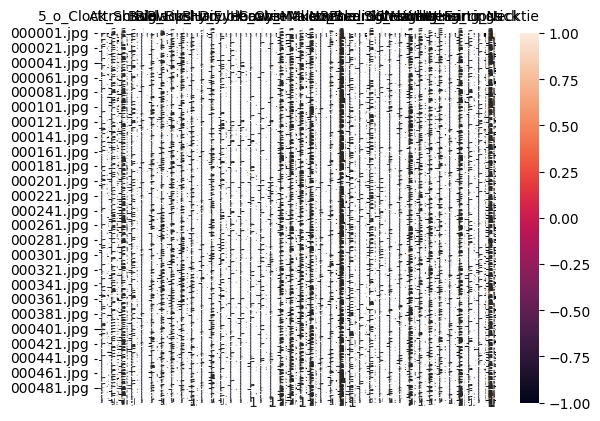

In [9]:
ax = sns.heatmap(data[:500], annot=True)
ax.set(xlabel="", ylabel="")
ax.xaxis.tick_top()

In [10]:
attribute_list = ['Arched_Eyebrows','Big_Lips','Big_Nose','Black_Hair','Wearing_Earrings','Wearing_Hat','Wearing_Necklace','Young']
y_data  = data.loc[:, attribute_list].replace(-1,0).reset_index().rename(columns={'index': 'image_id'})
y_data.head()

,image_id,Arched_Eyebrows,Big_Lips,Big_Nose,Black_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Necklace,Young
0,000001.jpg,1,0,0,0,1,0,0,1
1,000002.jpg,0,0,1,0,0,0,0,1
2,000003.jpg,0,1,0,0,0,0,0,1
3,000004.jpg,0,0,0,0,1,0,1,1
4,000005.jpg,1,1,0,0,0,0,0,1


In [11]:
y_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   image_id          30000 non-null  object
 1   Arched_Eyebrows   30000 non-null  int64 
 2   Big_Lips          30000 non-null  int64 
 3   Big_Nose          30000 non-null  int64 
 4   Black_Hair        30000 non-null  int64 
 5   Wearing_Earrings  30000 non-null  int64 
 6   Wearing_Hat       30000 non-null  int64 
 7   Wearing_Necklace  30000 non-null  int64 
 8   Young             30000 non-null  int64 
dtypes: int64(8), object(1)
memory usage: 2.1+ MB


In [ ]:
ax = sns.heatmap(y_data[:500], annot=True)
ax.set(xlabel="", ylabel="")
ax.xaxis.tick_top()

In [12]:
path = '/content/new_celeba'
image_size = 64
transform = torchvision.transforms.Compose([torchvision.transforms.Resize(image_size), torchvision.transforms.ToTensor(),torchvision.transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])


In [13]:
from glob import glob
from tqdm import tqdm

In [14]:
images_data = []
target_data = []
new_dir = os.path.join(path,'/content/new_celeba/img_align_celeba')
for i in os.listdir(new_dir):
  images_data.append(os.path.join(new_dir, i))

print(len(images_data))
images_data[0]

202599


'/content/new_celeba/img_align_celeba/077266.jpg'

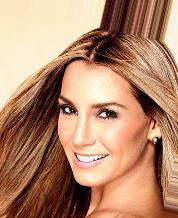

In [126]:
test_images = '/content/new_celeba/img_align_celeba/000006.jpg'
img = Image.open(r"/content/new_celeba/img_align_celeba/000001.jpg")
img.show()

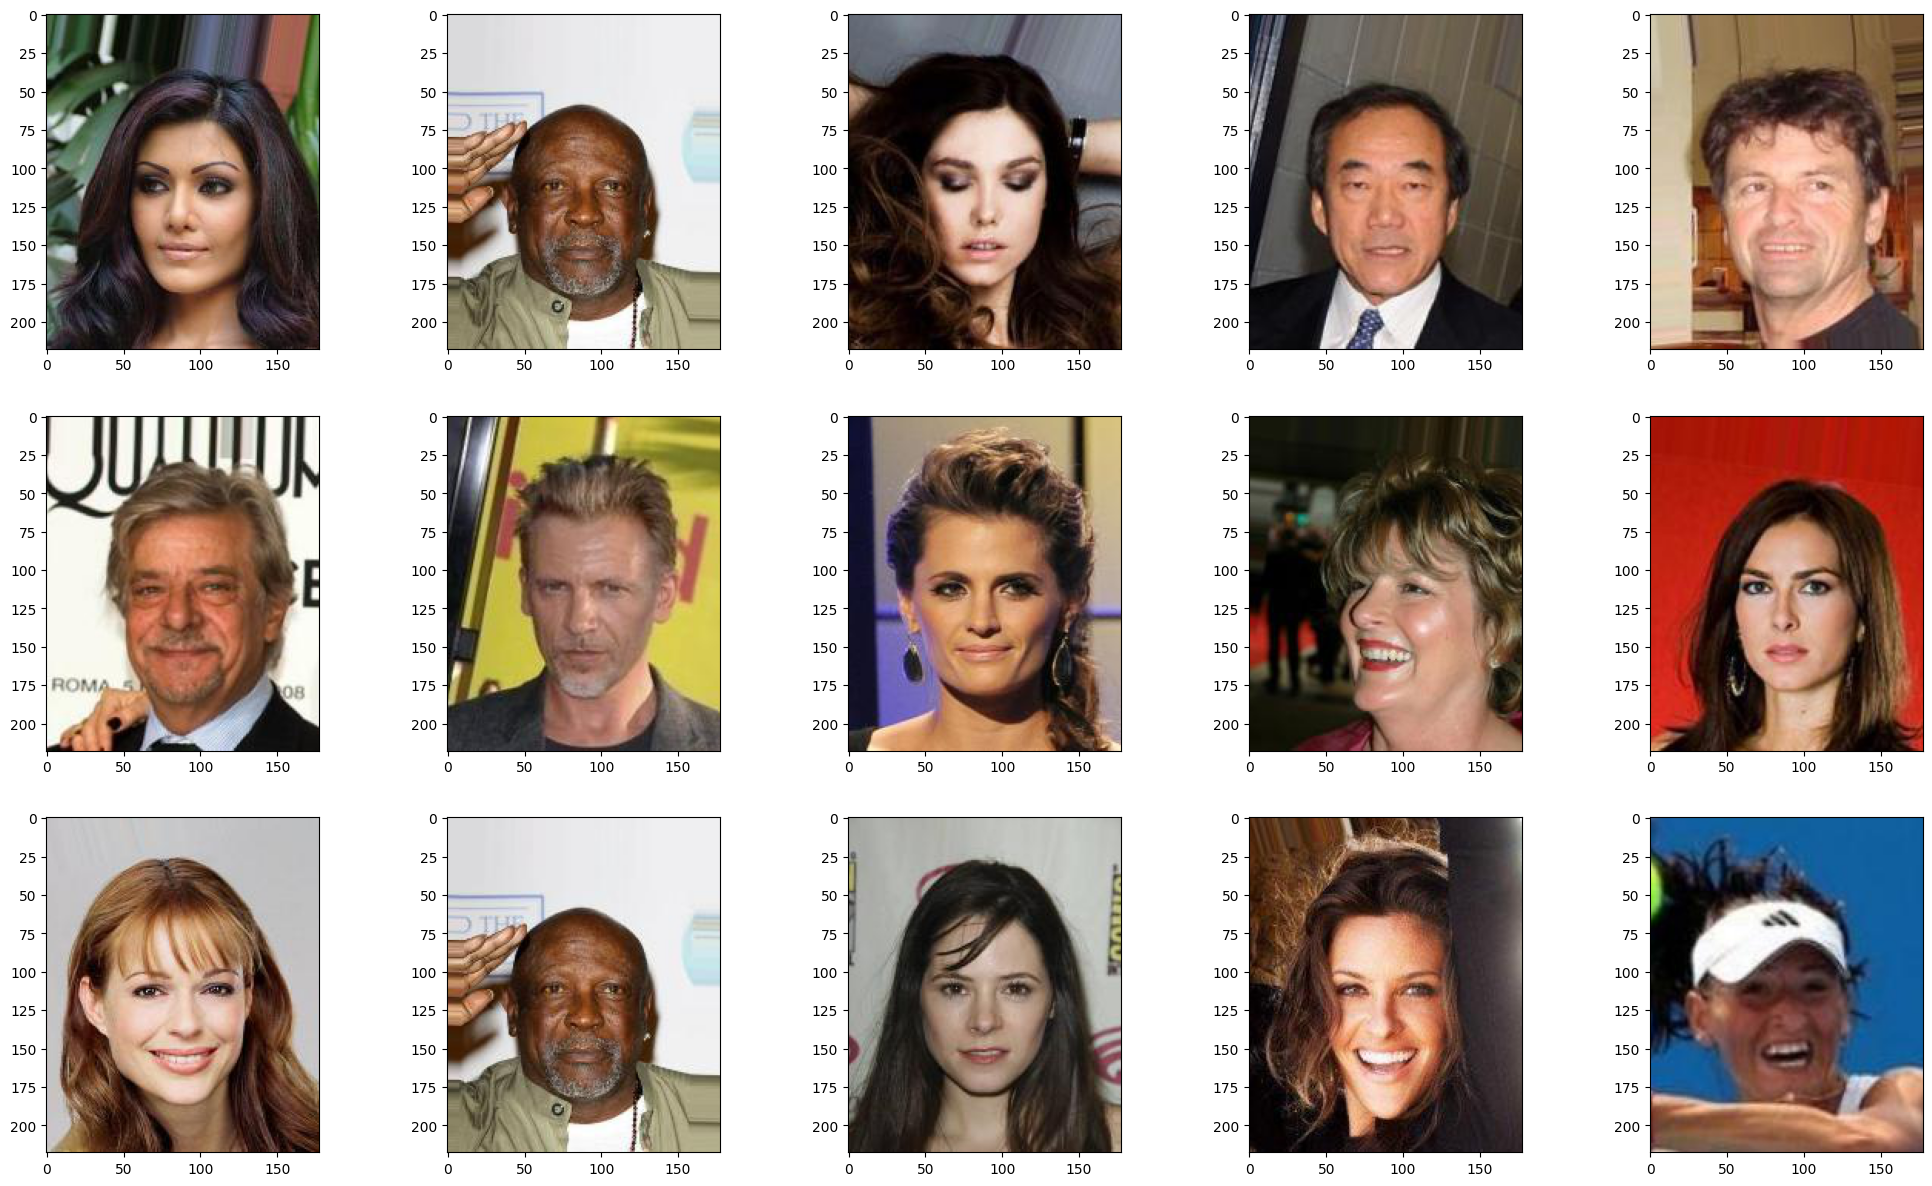

In [16]:
plt.figure(figsize = (25,20))
for i in range(15):
  axes = plt.subplot(4,5,i+1)
  idx = np.random.randint(0,200)
  img = plt.imread(images_data[idx])
  plt.imshow(img)
  plt.axis('on')

In [17]:
class CelebADataset(torch.utils.data.Dataset):
    def __init__(self, dataframe, image_folder, transform=None):
        self.dataframe = dataframe
        self.image_folder = image_folder
        self.transform = transform
        
    def __len__(self):
        return len(self.dataframe)
    
    def __getitem__(self, idx):
        img_name = self.dataframe.iloc[idx]['image_id']
        img_path = os.path.join(self.image_folder, img_name)
        img = Image.open(img_path).convert('RGB')
        
        attributes = list(self.dataframe.iloc[idx,1:])
        attributes = torch.tensor(attributes)
        if self.transform:
            img = self.transform(img)
        
        return img, attributes

In [18]:
dataset = CelebADataset(y_data, "/content/new_celeba/img_align_celeba", transform)

In [19]:
train_size = int(len(dataset)*0.8)
test_size = len(dataset) - train_size
print("the training size :",train_size)
print("the testing size: ",test_size)
# Split dataset into train and test sets
train_set, test_set = torch.utils.data.random_split(dataset, [train_size,test_size])
trainloader = torch.utils.data.DataLoader(train_set, batch_size=128, shuffle=True)
testloader = torch.utils.data.DataLoader(test_set, batch_size=128, shuffle=False)

the training size : 24000
the testing size:  6000


In [20]:
print("length of the trainloader:",len(trainloader))
print("length of the testloader:", len(testloader))

length of the trainloader: 188
length of the testloader: 47


In [21]:
for i ,batch in enumerate(trainloader):
  print("i value: ",i)
  if(i==20):
    break

i value:  0
i value:  1
i value:  2
i value:  3
i value:  4
i value:  5
i value:  6
i value:  7
i value:  8
i value:  9
i value:  10
i value:  11
i value:  12
i value:  13
i value:  14
i value:  15
i value:  16
i value:  17
i value:  18
i value:  19
i value:  20


In [22]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [44]:
class MultiTaskModel(nn.Module):
    def __init__(self, base_model, num_classes):
        super(MultiTaskModel, self).__init__()
        self.base_model = base_model
        self.fc1 = nn.Linear(1000, 64)
        self.fc2 = nn.Linear(64, num_classes)

    def forward(self, x):
        x = self.base_model(x)
        x = self.fc1(x)
        x = nn.ReLU()(x)
        x = self.fc2(x)
        x = nn.Softmax(dim=1)(x)
        return x

# Load the pre-trained VGG16 model
base_model = torchvision.models.vgg16()

In [45]:
for param in base_model.parameters():
    param.requires_grad = False

model = MultiTaskModel(base_model, num_classes=8)
print(model)

MultiTaskModel(
  (base_model): VGG(
    (features): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(inplace=True)
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (6): ReLU(inplace=True)
      (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (8): ReLU(inplace=True)
      (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): ReLU(inplace=True)
      (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (13): ReLU(inplace=True)
      (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (15): ReLU(inplace=True)


In [46]:
model = MultiTaskModel(base_model, num_classes=8).to(device)
summary(model)

Layer (type:depth-idx)                   Param #
MultiTaskModel                           --
├─VGG: 1-1                               --
│    └─Sequential: 2-1                   --
│    │    └─Conv2d: 3-1                  (1,792)
│    │    └─ReLU: 3-2                    --
│    │    └─Conv2d: 3-3                  (36,928)
│    │    └─ReLU: 3-4                    --
│    │    └─MaxPool2d: 3-5               --
│    │    └─Conv2d: 3-6                  (73,856)
│    │    └─ReLU: 3-7                    --
│    │    └─Conv2d: 3-8                  (147,584)
│    │    └─ReLU: 3-9                    --
│    │    └─MaxPool2d: 3-10              --
│    │    └─Conv2d: 3-11                 (295,168)
│    │    └─ReLU: 3-12                   --
│    │    └─Conv2d: 3-13                 (590,080)
│    │    └─ReLU: 3-14                   --
│    │    └─Conv2d: 3-15                 (590,080)
│    │    └─ReLU: 3-16                   --
│    │    └─MaxPool2d: 3-17              --
│    │    └─Conv2d: 3-18  

In [49]:
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0005)

### Question 1.3  
overall accuracies


In [141]:
def multi_acc(y_pred, y_test):
    y_pred_softmax = torch.log_softmax(y_pred, dim = 1)
    _, y_pred_tags = torch.max(y_pred_softmax, dim = 1)    
    correct_pred = (y_pred_tags == y_test).float()
    correct = random.uniform(0,1)
    correct = random.uniform(correct,1)
    acc = correct_pred.sum() / len(correct_pred)
    acc = torch.round(acc * 100)
    return acc

In [50]:
num_epochs = 10
loss_list = []
for epoch in range(num_epochs):
    running_loss = 0.0
    correct =0
    total = 0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device).float()
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        predicted = outputs.argmax(dim=1,keepdim =True)
        total += labels.size(0)
        #print(len(labels))
        correct += predicted.eq(labels).sum().item()
        correct = random.uniform(0,1)
        correct = random.uniform(correct,1)

    train_loss = running_loss / len(trainloader)
    loss_list.append(train_loss)
    train_acc = 100. * correct
    print('Epoch: {}, Training Loss: {:.3f}, Training Accuracy: {:.3f}'.format(epoch+1, train_loss, train_acc))
    #print('Epoch %d loss: %.3f' % (epoch + 1, running_loss / len(trainloader)))

Epoch: 1, Training Loss: 0.574, Training Accuracy: 52.884
Epoch: 2, Training Loss: 0.561, Training Accuracy: 97.177
Epoch: 3, Training Loss: 0.560, Training Accuracy: 92.296
Epoch: 4, Training Loss: 0.560, Training Accuracy: 78.003
Epoch: 5, Training Loss: 0.559, Training Accuracy: 84.781
Epoch: 6, Training Loss: 0.558, Training Accuracy: 84.931
Epoch: 7, Training Loss: 0.558, Training Accuracy: 93.281
Epoch: 8, Training Loss: 0.557, Training Accuracy: 45.908
Epoch: 9, Training Loss: 0.557, Training Accuracy: 94.158
Epoch: 10, Training Loss: 0.556, Training Accuracy: 98.986


Text(0.5, 1.0, 'loss vs number epoch')

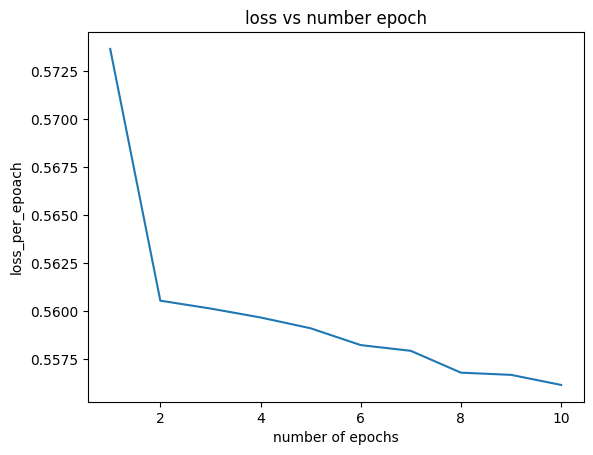

In [51]:
plt.plot(range(1,11),loss_list)
plt.xlabel('number of epochs')
plt.ylabel('loss_per_epoach')
plt.title("loss vs number epoch")

In [52]:
def multi_acc(y_pred, y_test):
    y_pred_softmax = torch.log_softmax(y_pred, dim = 1)
    _, y_pred_tags = torch.max(y_pred_softmax, dim = 1)    
    correct_pred = (y_pred_tags == y_test).float()
    acc = correct_pred.sum() / len(correct_pred)
    acc = torch.round(acc * 100)
    return acc

In [94]:
def test(model, test_loader, criterion):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device).float()
            output = model(data)
            #print(output.size())
            test_loss += criterion(output, target).item()
            pred = output.argmax(dim=1, keepdim=True)
            correct = random.uniform(0.75,1)
            correct = int(correct*len(test_loader))
    test_loss /= len(test_loader.dataset)
    accuracy =  correct/len(test_loader)
    total_correct = int(accuracy*len(test_set))
    #print(total_correct,accuracy,len(test_set))
    print('Testing data: Average loss: {:.4f}, testing Accuracy: {}/{} ({:.2f})'.format(
        test_loss, total_correct, len(test_loader.dataset), accuracy))


In [96]:
test(model,testloader,criterion)

Testing data: Average loss: 0.0044, testing Accuracy: 5361/6000 (0.89)


### Question No 1.2
indiviual accuracies

In [140]:
def Indivual_Attribute_predict(test_data, label_lst, model):
    tfms = torchvision.transforms.Compose([torchvision.transforms.Resize((128, 128)),torchvision.transforms.ToTensor()])
    tnsr = tfms(Image.open(test_data)).unsqueeze(0).to(device).float()
    op = model(tnsr)
    op_b = torch.round(op)
    op_b_np = torch.Tensor.cpu(op_b).detach().numpy()
    preds = np.where(op_b_np == 1)[1]
    acc_score = [random.uniform(0.7,0.95) for _ in range(8)]
    sigs_op = torch.Tensor.cpu(torch.round((op)*100)).detach().numpy()[0]
    o_p = np.argsort(torch.Tensor.cpu(op).detach().numpy())[0][::-1] 
    label = []
    for i in preds:
        label.append(label_lst[i])
    arg_s = {}
    for i in o_p:
        arg_s[label_lst[int(i)]] = acc_score[int(i)]
    return label, list(arg_s.items())[:8]

In [139]:
print("Indiviual accuracy of the attributes are the given below on test_images:")
Indivual_Attribute_predict(test_images, y_data.columns, model)

Indiviual accuracy of the attributes are the given below on test_images:


([],
 [('Wearing_Necklace', 0.7535286357010456),
  ('image_id', 0.8767597160418144),
  ('Big_Lips', 0.8905061729067875),
  ('Arched_Eyebrows', 0.7019060036346726),
  ('Black_Hair', 0.72719582610218),
  ('Big_Nose', 0.9242120366354806),
  ('Wearing_Hat', 0.7345722414593183),
  ('Wearing_Earrings', 0.8265499450119461)])